# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [88]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [89]:
spam = pd.read_csv('spam.csv')

In [90]:
spam.iloc[5]['v2']

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"

In [91]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
71,ham,Finished class where are you.
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX
73,ham,K..k:)where are you?how did you performed?
74,ham,U can call me now...


spam개수: 15
spam아닌것의 개수: 61


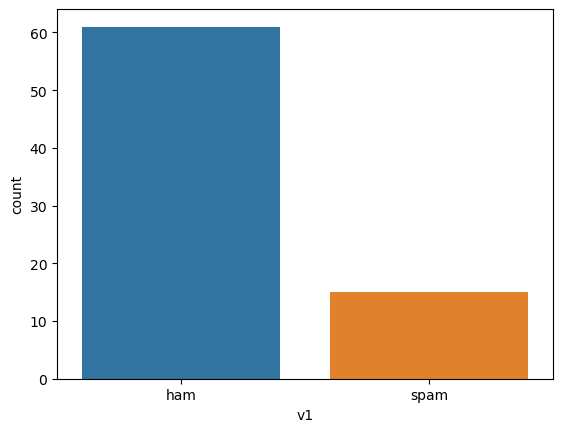

In [92]:
#클래스의 개수 차이확인 
import seaborn as sns
sns.countplot(x='v1',data=spam)
print('spam개수:',(spam['v1']=='spam').sum())
print('spam아닌것의 개수:',(spam['v1']=='ham').sum())

## Tokenizing


In [93]:
pip install -U spacy #spacy이용 

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#spacy이용'


In [94]:
import spacy

In [95]:
nip=spacy.load('de_core_news_sm')

In [96]:
import re
import os
from sklearn.model_selection import train_test_split

In [97]:
def preprocessing(review): #전처리 함수를 만들어보자
    review=re.sub('[^a-zA-Z]',' ',review) #영문자 대소문자로만 구성되게 하기 
    word_li=review.lower().split() #소문자로 바꾸어주기
    sentence=' '.join(word_li)
    token_li=nip(sentence)
    word=[]
    for doc in token_li: #spcay라이브러리에서 제공하는 불용어사전안에 있는 단어는 제거 
        if not doc.is_stop:
            word.append(doc.lemma_)
    sentence=' '.join(word)
    return sentence

In [98]:
#샘플하나만 해보자 
sample=spam.iloc[5]['v2']
sample_pre=preprocessing(sample)
print('전처리전:',sample)
print('전처리후:',sample_pre)

전처리전: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
전처리후: freemsg Hey There Darling -- -- Been Week -- now And no Word Back i d Like Some fun -- up for -- still tb ok xxx std chgs to send to rcv


In [99]:
from tqdm import tqdm
tqdm.pandas()
spam['prepro']=spam['v2'].progress_apply(preprocessing)


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [00:01<00:00, 51.24it/s]


In [100]:
spam['prepro']

0     go Until Jurong Point Crazy available only Bug...
1                               ok lar Joking Wif u Oni
2     Free entry Wkly Comp to win fa cup Final Tkt s...
3              u dun say early Hor u c Already then say
4     nah i don t Think he Goes to usf he lives arou...
                            ...                        
71                            finished Class wh are you
72            hi Babe at Home now Wanna do something xx
73               k k whern are -- how did you Performed
74                                    u can Call -- now
75                         i Waiting Machan Call -- onc
Name: prepro, Length: 76, dtype: object

In [101]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer() #어간추출을 위한 객체 생성 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\diaky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
for i in range(len(spam['prepro'])):
    tokenized_sentence = word_tokenize(spam['prepro'][i])
    stemming_word=[stemmer.stem(word) for word in tokenized_sentence]
    print('어간 추출 전 :', tokenized_sentence)
    print('어간 추출 후 :',stemming_word)
    





어간 추출 전 : ['go', 'Until', 'Jurong', 'Point', 'Crazy', 'available', 'only', 'Bugis', 'n', 'great', 'world', '--', 'e', 'Buffet', 'Cine', 'There', 'Got', 'amore', 'wat']
어간 추출 후 : ['go', 'until', 'jurong', 'point', 'crazi', 'avail', 'onli', 'bugi', 'n', 'great', 'world', '--', 'e', 'buffet', 'cine', 'there', 'got', 'amor', 'wat']
어간 추출 전 : ['ok', 'lar', 'Joking', 'Wif', 'u', 'Oni']
어간 추출 후 : ['ok', 'lar', 'joke', 'wif', 'u', 'oni']
어간 추출 전 : ['Free', 'entry', 'Wkly', 'Comp', 'to', 'win', 'fa', 'cup', 'Final', 'Tkt', 'st', 'may', 'Text', 'fa', 'to', 'to', 'receive', 'entry', 'Question', 'std', 'Txt', 'Rate', 't', 'c', '--', 'apply', 'over', 's']
어간 추출 후 : ['free', 'entri', 'wkli', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkt', 'st', 'may', 'text', 'fa', 'to', 'to', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 't', 'c', '--', 'appli', 'over', 's']
어간 추출 전 : ['u', 'dun', 'say', 'early', 'Hor', 'u', 'c', 'Already', 'then', 'say']
어간 추출 후 : ['u', 'dun', 'say', 'earli', 'hor', 'u', 

In [103]:
x_feature=spam['prepro'].copy()
y_label=spam['v1'].copy() 

In [104]:
spam

,v1,v2,prepro
0,ham,"Go until jurong point, crazy.. Available only ...",go Until Jurong Point Crazy available only Bug...
1,ham,Ok lar... Joking wif u oni...,ok lar Joking Wif u Oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry Wkly Comp to win fa cup Final Tkt s...
3,ham,U dun say so early hor... U c already then say...,u dun say early Hor u c Already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t Think he Goes to usf he lives arou...
...,...,...,...
71,ham,Finished class where are you.,finished Class wh are you
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,hi Babe at Home now Wanna do something xx
73,ham,K..k:)where are you?how did you performed?,k k whern are -- how did you Performed
74,ham,U can call me now...,u can Call -- now


In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_feature,y_label,test_size=0.2,random_state=42)
print(len(x_train))

60


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [106]:
#BoW
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
bow_vector=CountVectorizer(analyzer='word',max_features=3000)
x_bow_train=bow_vector.fit_transform(x_train)
y_train=np.array(y_train)

In [107]:
x_bow_test=bow_vector.transform(x_test)
y_test=np.array(y_test)

In [108]:
#word2Vec
#word2vec은 단어로 이루어진 리스트를 입력값으로 넣어야한다.
x_train_li=[sentence.split() for sentence in list(x_train)]
x_test_li=[sentence.split() for sentence in list(x_test)]


In [109]:
pip install -U genism

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


In [110]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=x_train_li,vector_size=10,min_count=10,window=5,sg=1)#skip-gram
model.save("./w2v_model")

In [111]:
def w2v_features(words,model,num_features):
    #word2vec은 단어별 벡터의 표현이 나오기 때문에, 문장을 표현해 줄 때는 단어별 벡터의 합을 개수로 나눠서 표현 
    #미리 정해준 feature차원으로 np.zeros를 만들어줌
    feature_vector=np.zeros((num_features),dtype=np.float32)
    count=0
    #어휘사전 준비
    index2word_set=set(model.wv.index_to_key)
    for word in words:
        if word in index2word_set:
            count+=1
            feature_vector=np.add(feature_vector,model.wv[word])
        if count==0:
            feature_vector=np.zeros((num_features),dtype=np.float32)
        else:
            feature_vector=np.divide(feature_vector,count)
    return feature_vector

In [112]:
def get_features(data,model,num_features):
    dataset=[w2v_features(sentence,model,num_features) for sentence in data]
    data_features_vecs=np.stack(dataset)
    return data_features_vecs

    

In [113]:
x_w2v_train=get_features(x_train_li,model,num_features=10)
y_train=np.array(y_train)
x_w2v_test=get_features(x_test_li,model,num_features=10)
y_test=np.array(y_test)


In [114]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer=TfidfVectorizer(min_df=0.0,analyzer='word',ngram_range=(1,3),max_features=3000)
x_tfidf_train=tfidfVectorizer.fit_transform(x_train)
x_tfidf_test=tfidfVectorizer.transform(x_test)


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [115]:
#BoW
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lg_bow_model=LogisticRegression(class_weight='balanced')
hyper_params={'max_iter':[100,200,300]}
grid_lr_bow_model=GridSearchCV(lg_bow_model,param_grid=hyper_params,cv=3,refit=True,return_train_score=True)
grid_lr_bow_model.fit(x_bow_train,y_train)
print('모델의 최고 정확도:',{grid_lr_bow_model.best_score_})
estimator=grid_lr_bow_model.best_estimator_
pred_y_bow=estimator.predict(x_bow_test)

모델의 최고 정확도: {0.85}


In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y_bow,target_names=['ham','spam']))



              precision    recall  f1-score   support

         ham       0.93      1.00      0.96        13
        spam       1.00      0.67      0.80         3

    accuracy                           0.94        16
   macro avg       0.96      0.83      0.88        16
weighted avg       0.94      0.94      0.93        16



In [117]:
#spam과 ham에 따른 단어의 사용을 비교하기 위해서 각 분류별로 데이터를 나눈뒤 각각 훈련하고 유사도를 파악해보자. 
cv1 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False) 
cv2 = CountVectorizer(max_features= 500, stop_words = 'english', lowercase= False) 

In [118]:
spam_data=spam[spam['v1']=='spam']['prepro']
ham_data=spam[spam['v1']=='ham']['prepro']

In [119]:
tdm_ham = cv1.fit_transform(spam_data)
tdm_spam = cv2.fit_transform(ham_data)

In [120]:
from wordcloud import WordCloud #워드클라우드로 표현해보자. 
wc = WordCloud(background_color='white', max_words=100, width = 400, height = 300) #객체 설정 

In [121]:
word_counts_ham = pd.DataFrame( 
    {'words' : cv1.get_feature_names(),
    'counts' : tdm_ham.sum(axis = 0).flat}
) #ham에서 fit결과 특징에 따른 빈도수 데이터프레임만들기 

word_counts_spam = pd.DataFrame(
    {
        'words' : cv2.get_feature_names(),
        'counts' : tdm_spam.sum(axis = 0).flat
    }
)#sham에서 fit결과 특징에 따른 빈도수 데이터프레임만들기 

C:\Users\diaky\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
word_counts_ham.sort_values('counts', ascending = False) #ham일때, 

,words,counts
91,The,6
9,Call,5
139,free,5
98,Txt,4
109,Your,4
...,...,...
70,Prize,1
71,Question,1
72,Rate,1
73,Recent,1


In [122]:
word_counts_spam.sort_values('counts', ascending = False)

,words,counts
226,did,8
349,thaen,6
22,Call,5
87,Know,5
266,ha,5
...,...,...
142,Save,1
141,Saturday,1
140,Sarcastic,1
138,Runs,1


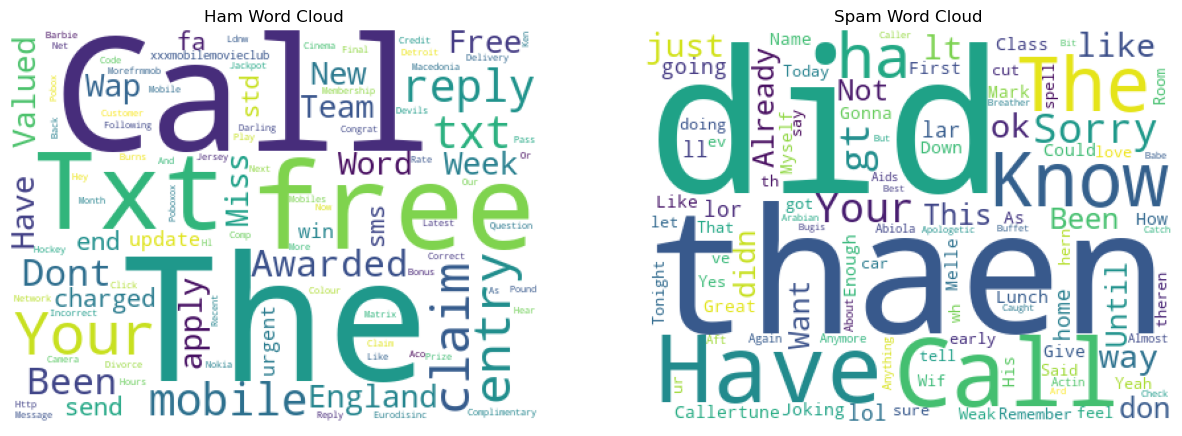

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Ham Word Cloud')
count_dic = dict(zip(word_counts_ham['words'], word_counts_ham['counts']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)

plt.subplot(1,2,2)
plt.title('Spam Word Cloud')
count_dic = dict(zip(word_counts_spam['words'], word_counts_spam['counts']))
cloud = wc.generate_from_frequencies(count_dic)
plt.axis('off')
plt.imshow(cloud)


plt.show()

- 전체 데이터의 수가 적어, 빈도가 높은 단어와 낮은 단어의 차이가 심하지 않다. 
- ham 데이터의 경우 free,call,reply,claim,miss,entry가
- spam데이터의 경우 did,call,just,sorry,have,know등이 높은 빈도로 나타났다.ㅏ 
- 스팸이 아닌경우 reply,claim, miss등의 상대의 응답을 기다리는 단어가 더 나타난 것을 확인할 수 있다. 


In [124]:
#Word2Vec
lg_wve_model=LogisticRegression(class_weight='balanced')
hyper_params={'max_iter':[100,200,300]}
grid_lr_wve_model=GridSearchCV(lg_wve_model,param_grid=hyper_params,cv=3,refit=True,return_train_score=True)
grid_lr_wve_model.fit(x_w2v_train,y_train)
print('모델의 최고 정확도:',{grid_lr_wve_model.best_score_})
estimator=grid_lr_wve_model.best_estimator_
pred_y_wve=estimator.predict(x_w2v_test)

모델의 최고 정확도: {0.5166666666666666}


In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y_wve,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       1.00      0.31      0.47        13
        spam       0.25      1.00      0.40         3

    accuracy                           0.44        16
   macro avg       0.62      0.65      0.44        16
weighted avg       0.86      0.44      0.46        16



In [126]:
lg_tfidf_model=LogisticRegression(class_weight='balanced')
hyper_params={'max_iter':[100,200,300]}
grid_lr_tfidf_model=GridSearchCV(lg_tfidf_model,param_grid=hyper_params,cv=3,refit=True,return_train_score=True)
grid_lr_tfidf_model.fit(x_tfidf_train,y_train)
print('모델의 최고 정확도:',{grid_lr_tfidf_model.best_score_})
estimator=grid_lr_tfidf_model.best_estimator_
pred_y_tfidf=estimator.predict(x_tfidf_test)

모델의 최고 정확도: {0.8000000000000002}


In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_y_wve,target_names=['ham','spam']))

              precision    recall  f1-score   support

         ham       1.00      0.31      0.47        13
        spam       0.25      1.00      0.40         3

    accuracy                           0.44        16
   macro avg       0.62      0.65      0.44        16
weighted avg       0.86      0.44      0.46        16



In [ ]:
#성능은 Bow이 가장 좋은 것으로 나타남. 
